# Importing Required Libraries

In [1957]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

## Importing CSV Data from file and Understading Data

In [1958]:
df = pd.read_csv(r".\Leads.csv")
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [1959]:
# Checking the Shape of dataset
df.shape

(9240, 37)

In [1960]:
# descrbing and checking the data set
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

# Dataset Cleaning

In [1961]:
# Checking the Columns Data Types and Null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### There are some superfluous columns, it is good to drop it before moving ahead becuase they won't help with our analysis.; 

like: 
    1. Prospect ID
    2. City
    3. Country
    4. Lead Number
    5. I agree to pay the amount through cheque
    6. a free copy of Mastering The Interview
    7. Do Not Cal
    8. Search
    9. Magazine
    10. Newspaper Article
    11. X Education Forums
    12. Newspaper
    13. Digital Advertisement 
    14. Through Recommendations 
    15. Receive More Updates About Our Courses
    16. Update me on Supply Chain Content
    17. Get updates on DM Content
    

In [1962]:
df.drop([ 'Prospect ID','Lead Number','City','Country',
          'A free copy of Mastering The Interview', 'Search', 
          'I agree to pay the amount through cheque', 'Do Not Call',
          'Newspaper Article','Magazine', 'Newspaper',
          'Get updates on DM Content', 'X Education Forums',
          'Through Recommendations', 'Digital Advertisement',
          'Update me on Supply Chain Content',
          'Receive More Updates About Our Courses']
        , axis = 1, inplace = True)

In [1963]:
df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  How did you hear about X Education What is your current occupation  \
0                             Select                      Unemployed   
1                             Select                      Unemployed   
2                             Select                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

  What matters most to you in choosing a course  \
0                       Better Career Prospects   
1                       Better Career Prospects   
2                       Better Career Prospects   
3                       Better Career Prospects   
4                       Better Career Prospects   

                                  Tags      Lead Quality    Lead Profile  \
0          Interested in other courses  Low in Relevance          Select   
1                              Ringing               NaN          Select   
2  Will revert after reading the email          Might be  Potential Lead   
3                              Ringing          Not Sure          Select   
4  Will revert after reading the email          Might be          Select   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

   Asymmetrique Activity Score  Asymmetrique Profile Score  \
0                         15.0                        15.0   
1                         15.0                        15.0   
2                         14.0                        20.0   
3                         13.0                        17.0   
4                         15.0                        18.0   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [1964]:
# Checking the % of null values in each column
round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
How did you hear about X Education               23.89
Specialization                                   15.56
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Total Time Spent on Website                       0.00
Converted                                         0.00
Do Not Ema

###### As we see the above 6 columns have more than 30% missing (null) values and these columns should be removed

In [1965]:
df.drop(['Lead Quality','Asymmetrique Profile Score', 'Tags',
         'Asymmetrique Profile Index','Asymmetrique Activity Index',
        'Asymmetrique Activity Score']
        , axis = 1, inplace = True)

In [1966]:
# Checking the % of null values in each column after drpping the 6 columns
round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
How did you hear about X Education               23.89
Specialization                                   15.56
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Do Not Email                                      0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
dtype: float64

### Checking the 9 columns with have missing values

#### 1. Checking the value counts of "What matters most to you in choosing a course"column 

In [1967]:
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

###### We will drop the above column bacuse 6529 student selected  'Better Career Prospects' option while the other two options selected once and twice

In [1968]:
df.drop(['What matters most to you in choosing a course'], axis = 1, inplace = True)
round(df.isnull().sum()).sort_values(ascending=False)

Lead Profile                          2709
What is your current occupation       2690
How did you hear about X Education    2207
Specialization                        1438
TotalVisits                            137
Page Views Per Visit                   137
Last Activity                          103
Lead Source                             36
Lead Origin                              0
Do Not Email                             0
Converted                                0
Total Time Spent on Website              0
Last Notable Activity                    0
dtype: int64

#### 2. Checking the value counts of "Lead Profile" column

In [1969]:
df['Lead Profile'].value_counts(dropna=False)

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

###### we will drop the above column becasue it has 6855(4146+2709)  missing values which is above the 30%

In [1970]:
df.drop(['Lead Profile'], axis = 1, inplace = True)

#### 3. Checking the value counts of "What is your current occupation" column

In [1971]:
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

###### The column has 2690 missing values. The most selected option is unemployed, we will not drop the entire column nor drop rows with the missing values but we will impute missing values with Unemployed

In [1972]:
df['What is your current occupation'].fillna('Unemployed', inplace=True)

In [1973]:
round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)

How did you hear about X Education    23.89
Specialization                        15.56
TotalVisits                            1.48
Page Views Per Visit                   1.48
Last Activity                          1.11
Lead Source                            0.39
Lead Origin                            0.00
Do Not Email                           0.00
Converted                              0.00
Total Time Spent on Website            0.00
What is your current occupation        0.00
Last Notable Activity                  0.00
dtype: float64

#### 4. Checking the value counts of "How did you hear about X Education" column

In [1974]:
df['How did you hear about X Education'].value_counts(dropna=False)

Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

###### we will drop the above column becasue it has 5062(5043+19) missing values which is above the 30%

In [1975]:
df.drop(['How did you hear about X Education'], axis = 1, inplace = True)

round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)

Specialization                     15.56
TotalVisits                         1.48
Page Views Per Visit                1.48
Last Activity                       1.11
Lead Source                         0.39
Lead Origin                         0.00
Do Not Email                        0.00
Converted                           0.00
Total Time Spent on Website         0.00
What is your current occupation     0.00
Last Notable Activity               0.00
dtype: float64

#### 5. Checking the value counts of "Specialization" column

In [1976]:
df['Specialization'].value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

###### The column has 1947 missing values, we will not drop the entire column nor drop rows with the missing values, but we will create another category by the name of 'Other'

In [1977]:
df.Specialization = df.Specialization.fillna('Select')
df['Specialization'] = df['Specialization'].replace('Select', 'Other')
df['Specialization'].value_counts(dropna=False)

Other                                3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [1978]:
round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)

TotalVisits                        1.48
Page Views Per Visit               1.48
Last Activity                      1.11
Lead Source                        0.39
Lead Origin                        0.00
Do Not Email                       0.00
Converted                          0.00
Total Time Spent on Website        0.00
Specialization                     0.00
What is your current occupation    0.00
Last Notable Activity              0.00
dtype: float64

#### 6. Checking the value counts of "TotalVisits " column

In [1979]:
df['TotalVisits'].value_counts(dropna=False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

###### we will impute the 137 missing values with 0.0

In [1980]:
df['TotalVisits'].fillna(0.0, inplace=True)
round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)

Page Views Per Visit               1.48
Last Activity                      1.11
Lead Source                        0.39
Lead Origin                        0.00
Do Not Email                       0.00
Converted                          0.00
TotalVisits                        0.00
Total Time Spent on Website        0.00
Specialization                     0.00
What is your current occupation    0.00
Last Notable Activity              0.00
dtype: float64

#### 7. Checking the value counts of "Page Views Per Visit " column

In [1981]:
df['Page Views Per Visit'].value_counts(dropna=False)

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.56       1
6.33       1
1.64       1
8.21       1
2.08       1
Name: Page Views Per Visit, Length: 115, dtype: int64

###### we will impute the missing values in the above column with 0.0

In [1982]:
df['Page Views Per Visit'].fillna(0.00, inplace=True)
round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)

Last Activity                      1.11
Lead Source                        0.39
Lead Origin                        0.00
Do Not Email                       0.00
Converted                          0.00
TotalVisits                        0.00
Total Time Spent on Website        0.00
Page Views Per Visit               0.00
Specialization                     0.00
What is your current occupation    0.00
Last Notable Activity              0.00
dtype: float64

#### 8. Checking the value counts of "Last Activity" column

In [1983]:
df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

###### we will impute the 103 missing values in the above column with 'Email opened'

In [1984]:
df['Last Activity'].fillna('Email Opened', inplace=True)
round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)

Lead Source                        0.39
Lead Origin                        0.00
Do Not Email                       0.00
Converted                          0.00
TotalVisits                        0.00
Total Time Spent on Website        0.00
Page Views Per Visit               0.00
Last Activity                      0.00
Specialization                     0.00
What is your current occupation    0.00
Last Notable Activity              0.00
dtype: float64

#### 9. Checking the value counts of "Lead Source" column

In [1985]:
df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

###### we will Impute the 36 missing values with 'Google'

In [1986]:
df['Lead Source'].fillna('Google', inplace=True)
# There are two option google, we will replace and merge into one
df['Lead Source'] = df['Lead Source'].replace('google', 'Google')
df['Lead Source'].value_counts(dropna=False)

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [1987]:
round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)

Lead Origin                        0.0
Lead Source                        0.0
Do Not Email                       0.0
Converted                          0.0
TotalVisits                        0.0
Total Time Spent on Website        0.0
Page Views Per Visit               0.0
Last Activity                      0.0
Specialization                     0.0
What is your current occupation    0.0
Last Notable Activity              0.0
dtype: float64

In [1988]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9240 non-null   object 
 1   Lead Source                      9240 non-null   object 
 2   Do Not Email                     9240 non-null   object 
 3   Converted                        9240 non-null   int64  
 4   TotalVisits                      9240 non-null   float64
 5   Total Time Spent on Website      9240 non-null   int64  
 6   Page Views Per Visit             9240 non-null   float64
 7   Last Activity                    9240 non-null   object 
 8   Specialization                   9240 non-null   object 
 9   What is your current occupation  9240 non-null   object 
 10  Last Notable Activity            9240 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 794.2+ KB


In [1989]:
df.shape

(9240, 11)

### Creating Dummy Variables for Categorical Data
#### We need to create dummy variables for the following columns.
- Lead Origin
- Lead Sourc
- Do Not Email
- Last Activity
- Specialization
- What is your current occupation
- Last Notable Activity

In [1990]:
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization','What is your current occupation',
                             'Last Notable Activity']], drop_first=True)
dummy.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
0                             0                 0                 0   
1                             0                 0                 0   
2                             0                 0                 0   
3                             0                 0                 0   
4                             0                 0                 0   

   Lead Source_testone  Lead Source_welearnblog_Home  \
0                    0                             0   
1                    0                             0   
2                    0                             0   
3                    0                             0   
4                    0                             0   

   Lead Source_youtubechannel  Do Not Email_Yes  \
0                           0                 0   
1                           0                 0   
2                           0                 0   
3                           0                 0   
4                           0                 0   

   Last Activity_Converted to Lead  Last Activity_Email Bounced  \
0                   

In [1991]:
# we will merge/concatinicate the df and dummy datasets
df = pd.concat([df,dummy], axis=1)

# we will drop those columns which were created for the dummy
df = df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization','What is your current occupation',
                             'Last Notable Activity'], axis=1)
df.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
0                             0                 0                 0   
1                             0                 0                 0   
2                             0                 0                 0   
3                             0                 0                 0   
4                             0                 0                 0   

   Lead Source_testone  Lead Source_welearnblog_Home  \
0                    0                             0   
1                    0                             0   
2                    0                             0   
3                    0    

In [1992]:
print('Shape of the new dataframe is:' , df.shape)

Shape of the new dataframe is: (9240, 82)


### Splitting the data into Train and Test Dataset

In [1993]:
X = df.drop(['Converted'], 1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
0                             0                 0                 0   
1                             0                 0                 0   
2                             0                 0                 0   
3                             0                 0                 0   
4                             0                 0                 0   

   Lead Source_testone  Lead Source_welearnblog_Home  \
0                    0                             0   
1                    0                             0   
2                    0                             0   
3                    0                             0   
4                    0              

In [1994]:
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1995]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

In [1996]:
print('Shape of the Train data is:' , X_train.shape)
print('Shape of the Test data is:' , y_test.shape)

Shape of the Train data is: (6468, 81)
Shape of the Test data is: (2772,)


In [1997]:
# Checking the Train Data
pd.set_option('display.max_columns', None)
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
1871          0.0                            0                  0.00   
6795          4.0                          487                  1.33   
3516          5.0                          106                  2.50   
8105          5.0                         1230                  5.00   
3934          0.0                            0                  0.00   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1871                                    0                          0   
6795                                    1                          0   
3516                                    0                          0   
8105                                    1                          0   
3934                                    0                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
1871                        0                           0   
6795                        0                           0   
3516                        0                           0   
8105                        0                           0   
3934                        0                           0   

      Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
1871                           0                     0                   0   
6795                           1                     0                   0   
3516                           0                     0                   0   
8105                           0                     0                   1   
3934                           0                     0                   0   

      Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
1871                      0                   0                       1   
6795                      0                   0                       0   
3516                      0                   0                       1   
8105                      0                   0                       0   
3934                      0                   0                       1   

      Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
1871                           0                              0   
6795                           0                              0   
3516                           0                              0   
8105                           0                              0   
3934                           0                              0   

      Lead Source_Press_Release  Lead Source_Reference  \
1871                          0                      0   
6795                          0                      0   
3516                          0                      0   
8105                          0                      0   
3934                          0                      0   

      Lead Source_Referral Sites  Lead Source_Social Media  \
1871                           0                         0   
6795                           0                         0   
3516                           0                         0   
8105                           0                         0   
3934                           0                         0   

      Lead Source_WeLearn  Lead Source_Welingak Website  Lead Source_bing  \
1871                    0                             0                 0   
6795                    0                             0                 0   
3516                    0                             0                 0   
8105                    0                             0                 0   
3934                    0                             0                 0   

      Lead Source_blog  Lead Source_testone  Lead Source_welearnblog_Home  \
1871                 0                    0                             0   
6795                 0                    0                             0   
3516                 0            

### Feature Scaling

In [1998]:
# We do a MinMax scaling
scaler = MinMaxScaler()    #Instantiating the object
X_train[['Page Views Per Visit', 'TotalVisits', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['Page Views Per Visit', 'TotalVisits', 'Total Time Spent on Website']])
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
1871     0.000000                     0.000000              0.000000   
6795     0.015936                     0.214349              0.024182   
3516     0.019920                     0.046655              0.045455   
8105     0.019920                     0.541373              0.090909   
3934     0.000000                     0.000000              0.000000   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1871                                    0                          0   
6795                                    1                          0   
3516                                    0                          0   
8105                                    1                          0   
3934                                    0                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
1871                        0                           0   
6795                        0                           0   
3516                        0                           0   
8105                        0                           0   
3934                        0                           0   

      Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
1871                           0                     0                   0   
6795                           1                     0                   0   
3516                           0                     0                   0   
8105                           0                     0                   1   
3934                           0                     0                   0   

      Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
1871                      0                   0                       1   
6795                      0                   0                       0   
3516                      0                   0                       1   
8105                      0                   0                       0   
3934                      0                   0                       1   

      Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
1871                           0                              0   
6795                           0                              0   
3516                           0                              0   
8105                           0                              0   
3934                           0                              0   

      Lead Source_Press_Release  Lead Source_Reference  \
1871                          0                      0   
6795                          0                      0   
3516                          0                      0   
8105                          0                      0   
3934                          0                      0   

      Lead Source_Referral Sites  Lead Source_Social Media  \
1871                           0                         0   
6795                           0                         0   
3516                           0                         0   
8105                           0                         0   
3934                           0                         0   

      Lead Source_WeLearn  Lead Source_Welingak Website  Lead Source_bing  \
1871                    0                             0                 0   
6795                    0                             0                 0   
3516                    0                             0                 0   
8105                    0                             0                 0   
3934                    0                             0                 0   

      Lead Source_blog  Lead Source_testone  Lead Source_welearnblog_Home  \
1871                 0                    0                             0   
6795                 0                    0                             0   
3516                 0            

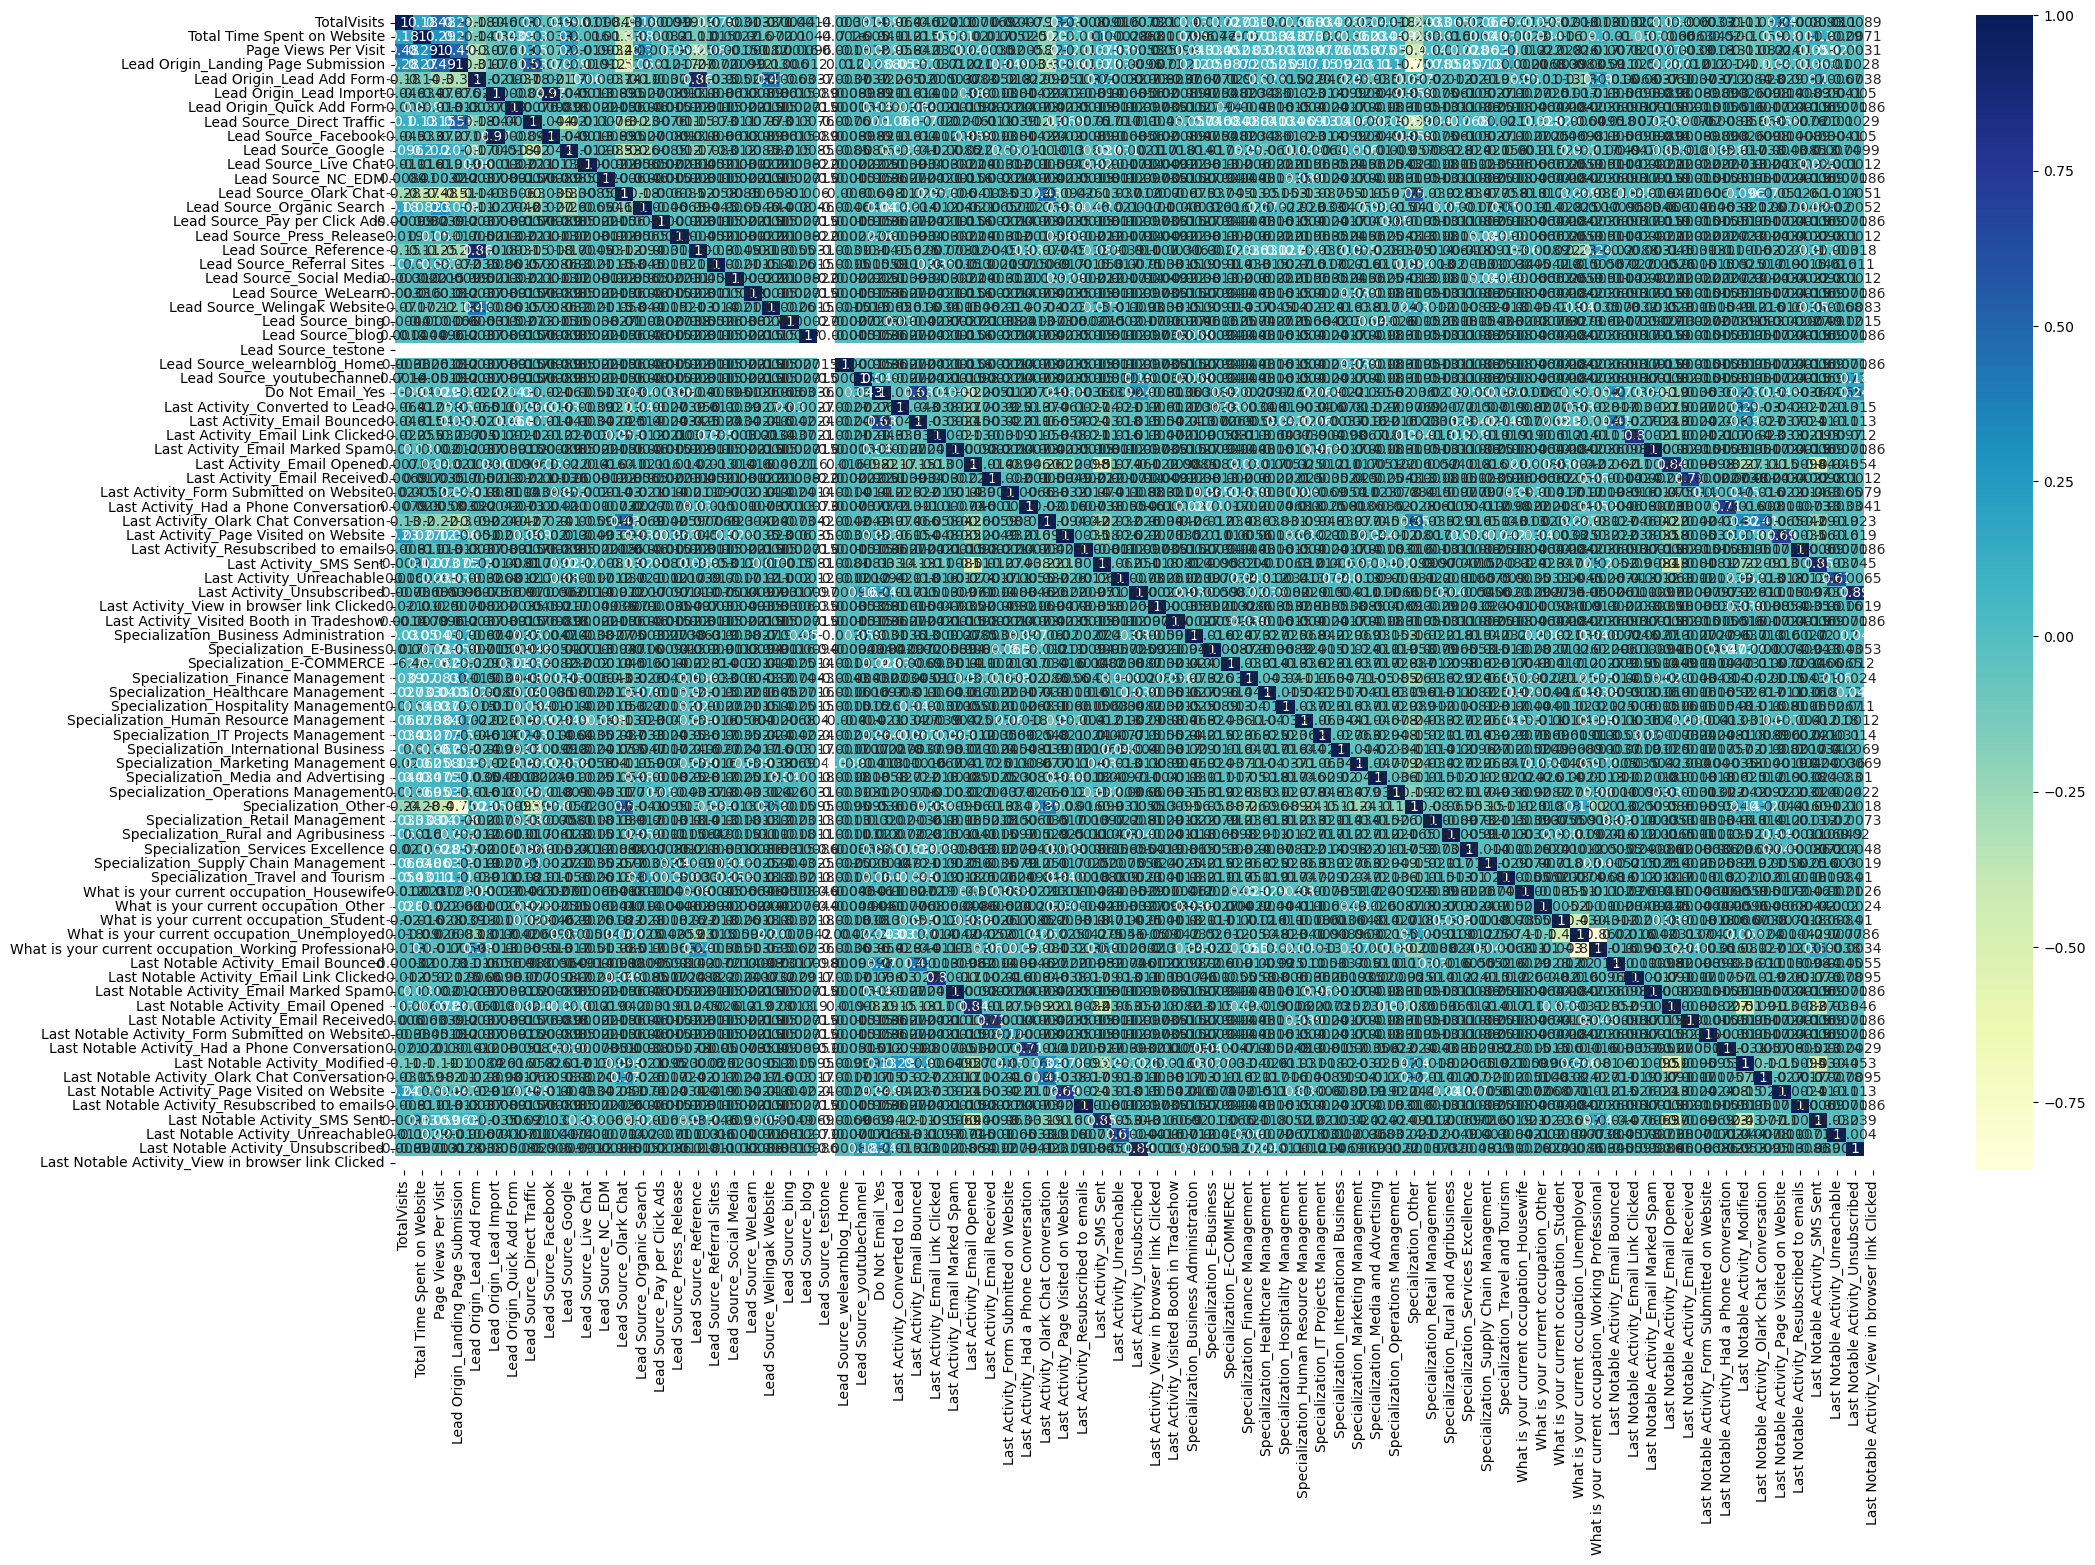

In [1999]:
# Checking the Heatmap
plt.figure(figsize=(24,15))
sns.heatmap(X_train.corr(),annot=True, cmap='YlGnBu')
plt.show()

In [2000]:
#Let's check the lead coversion rate
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100

Converted

38.53896103896104

# Building the Model
The number of columns which have are manageable, we first build a model with all the columns, and then keep removing the columns based upon RFE 

In [2001]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=23)    
rfe = rfe.fit(X_train, y_train)

In [2002]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 31),
 ('Lead Origin_Quick Add Form', False, 30),
 ('Lead Source_Direct Traffic', False, 20),
 ('Lead Source_Facebook', False, 19),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Live Chat', False, 35),
 ('Lead Source_NC_EDM', False, 10),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 23),
 ('Lead Source_Pay per Click Ads', False, 34),
 ('Lead Source_Press_Release', False, 33),
 ('Lead Source_Reference', False, 43),
 ('Lead Source_Referral Sites', False, 22),
 ('Lead Source_Social Media', False, 7),
 ('Lead Source_WeLearn', False, 17),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 47),
 ('Lead Source_blog', False, 21),
 ('Lead Source_testone', False, 58),
 ('Lead Source_welearnblog_Home', False, 2

In [2003]:
col = X_train.columns[rfe.support_]
X_train = X_train[col]

#### Model 1

In [2004]:
import statsmodels.api as sm

In [2005]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2616.6
Date:                Tue, 15 Aug 2023   Deviance:                       5233.3
Time:                        11:50:10   Pearson chi2:                 7.59e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4056
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2583      0.209     -1.234      0.217      -0.668       0.152
TotalVisits                                              8.6722      2.427      3.573      0.000       3.915      13.429
Total Time Spent on Website                              4.4747      0.166     26.955      0.000       4.149       4.800
Page Views Per Visit                                    -3.5324      1.321     -2.674      0.007      -6.122      -0.943
Lead Origin_Landing Page Submission                     -1.1114      0.129     -8.611      0.000      -1.364      -0.858
Lead Origin_Lead Add Form                                3.1079      0.214     14.528      0.000       2.689       3.527
Lead Source_Olark Chat                                   0.9504      0.133      7.120      0.000       0.689       1.212
Lead Source_Welingak Website                             2.4552      0.746      3.291      0.001       0.993       3.917
Do Not Email_Yes                                        -1.2341      0.197     -6.264      0.000      -1.620      -0.848
Last Activity_Converted to Lead                         -0.7760      0.235     -3.306      0.001      -1.236      -0.316
Last Activity_Email Bounced                             -0.7721      0.358     -2.160      0.031      -1.473      -0.071
Last Activity_Had a Phone Conversation                   0.8696      0.965      0.901      0.368      -1.022       2.761
Last Activity_Olark Chat Conversation                   -1.0142      0.206     -4.920      0.000      -1.418      -0.610
Last Activity_SMS Sent                                   0.5889      0.147      4.014      0.000       0.301       0.876
Specialization_Hospitality Management                   -1.0040      0.332     -3.027      0.002      -1.654      -0.354
Specialization_Other                                    -1.1368      0.124     -9.152      0.000      -1.380      -0.893
What is your current occupation_Housewife               22.9593   1.34e+04      0.002      0.999   -2.62e+04    2.63e+04
What is your current occupation_Working Professional     2.6618      0.194     13.738      0.000       2.282       3.042
Last Notable Activity_Email Link Clicked                -1.3607      0.310     -4.394      0.000      -1.968      -0.754
Last Notable Activity_Email Opened                      -0.8175      0.166     -4.924      0.000      -1.143      -0.492
Last Notable Activity_Had a Phone Conversation           1.5337      1.478      1.038      0.299      -1.362       4.430
Last Notable Activity_Modified                          -1.3724      0.134    -10.236      0.000      -1.635      -1.110
Last Notable Activity_Olark Chat Conversation           -1

we will remove the column "What is your current occupation_Housewife" bacuase it has higher Pvalue 0.999

In [2006]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

#### Model 2

In [2007]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2624.0
Date:                Tue, 15 Aug 2023   Deviance:                       5248.0
Time:                        11:50:10   Pearson chi2:                 7.62e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4043
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2402      0.209     -1.149      0.250      -0.650       0.169
TotalVisits                                              8.5856      2.419      3.549      0.000       3.844      13.327
Total Time Spent on Website                              4.4704      0.166     26.965      0.000       4.145       4.795
Page Views Per Visit                                    -3.5929      1.320     -2.722      0.006      -6.180      -1.006
Lead Origin_Landing Page Submission                     -1.1054      0.129     -8.572      0.000      -1.358      -0.853
Lead Origin_Lead Add Form                                3.1183      0.214     14.594      0.000       2.700       3.537
Lead Source_Olark Chat                                   0.9453      0.133      7.089      0.000       0.684       1.207
Lead Source_Welingak Website                             2.4407      0.746      3.272      0.001       0.979       3.903
Do Not Email_Yes                                        -1.2387      0.197     -6.290      0.000      -1.625      -0.853
Last Activity_Converted to Lead                         -0.7932      0.234     -3.383      0.001      -1.253      -0.334
Last Activity_Email Bounced                             -0.7846      0.357     -2.195      0.028      -1.485      -0.084
Last Activity_Had a Phone Conversation                   0.8553      0.965      0.886      0.375      -1.036       2.747
Last Activity_Olark Chat Conversation                   -1.0252      0.206     -4.978      0.000      -1.429      -0.622
Last Activity_SMS Sent                                   0.5742      0.146      3.921      0.000       0.287       0.861
Specialization_Hospitality Management                   -1.0106      0.332     -3.047      0.002      -1.661      -0.361
Specialization_Other                                    -1.1414      0.124     -9.195      0.000      -1.385      -0.898
What is your current occupation_Working Professional     2.6537      0.194     13.703      0.000       2.274       3.033
Last Notable Activity_Email Link Clicked                -1.3611      0.308     -4.422      0.000      -1.964      -0.758
Last Notable Activity_Email Opened                      -0.8251      0.166     -4.977      0.000      -1.150      -0.500
Last Notable Activity_Had a Phone Conversation           1.5316      1.478      1.037      0.300      -1.364       4.428
Last Notable Activity_Modified                          -1.3707      0.134    -10.226      0.000      -1.633      -1.108
Last Notable Activity_Olark Chat Conversation           -1.1199      0.400     -2.797      0.005      -1.905      -0.335
Last Notable Activity_Page Visited on Website           -1

we will remove the column "Last Activity_Had a Phone Conversation" bacuase it has higher Pvalue 375

In [2008]:
X_train.drop('Last Activity_Had a Phone Conversation', axis = 1, inplace = True)

##### Model 3

In [2009]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2624.4
Date:                Tue, 15 Aug 2023   Deviance:                       5248.8
Time:                        11:50:10   Pearson chi2:                 7.28e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4042
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2342      0.209     -1.122      0.262      -0.644       0.175
TotalVisits                                              8.5646      2.418      3.543      0.000       3.826      13.303
Total Time Spent on Website                              4.4737      0.166     26.987      0.000       4.149       4.799
Page Views Per Visit                                    -3.5818      1.319     -2.715      0.007      -6.168      -0.996
Lead Origin_Landing Page Submission                     -1.1055      0.129     -8.573      0.000      -1.358      -0.853
Lead Origin_Lead Add Form                                3.1202      0.214     14.605      0.000       2.702       3.539
Lead Source_Olark Chat                                   0.9444      0.133      7.083      0.000       0.683       1.206
Lead Source_Welingak Website                             2.4374      0.746      3.268      0.001       0.975       3.899
Do Not Email_Yes                                        -1.2399      0.197     -6.294      0.000      -1.626      -0.854
Last Activity_Converted to Lead                         -0.8022      0.234     -3.425      0.001      -1.261      -0.343
Last Activity_Email Bounced                             -0.7923      0.357     -2.216      0.027      -1.493      -0.092
Last Activity_Olark Chat Conversation                   -1.0331      0.206     -5.021      0.000      -1.436      -0.630
Last Activity_SMS Sent                                   0.5668      0.146      3.878      0.000       0.280       0.853
Specialization_Hospitality Management                   -1.0124      0.332     -3.052      0.002      -1.663      -0.362
Specialization_Other                                    -1.1400      0.124     -9.186      0.000      -1.383      -0.897
What is your current occupation_Working Professional     2.6586      0.194     13.739      0.000       2.279       3.038
Last Notable Activity_Email Link Clicked                -1.3684      0.308     -4.447      0.000      -1.972      -0.765
Last Notable Activity_Email Opened                      -0.8325      0.166     -5.029      0.000      -1.157      -0.508
Last Notable Activity_Had a Phone Conversation           2.3805      1.125      2.116      0.034       0.176       4.585
Last Notable Activity_Modified                          -1.3698      0.134    -10.219      0.000      -1.632      -1.107
Last Notable Activity_Olark Chat Conversation           -1.1191      0.400     -2.795      0.005      -1.904      -0.334
Last Notable Activity_Page Visited on Website           -1.3254      0.246     -5.378      0.000      -1.808      -0.842
==========================================================

A p-value less than 0.05 is generally considered good for a logistic regression model. This indicates that the probability of obtaining the observed results by chance alone is less than 5%, suggesting that there is a significant relationship between the predictor variables and the outcome variable. However, the specific threshold for a "good" p-value may vary depending on the context and the research question being addressed. Pvalue of all columns are less than 0.5, it looks good.

###### We will check the VIF values for remaining variables.

In [2010]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                 Lead Origin_Landing Page Submission  5.45
2                                Page Views Per Visit  3.86
16                 Last Notable Activity_Email Opened  3.77
13                               Specialization_Other  3.64
18                     Last Notable Activity_Modified  3.63
11                             Last Activity_SMS Sent  3.23
5                              Lead Source_Olark Chat  2.40
10              Last Activity_Olark Chat Conversation  2.13
1                         Total Time Spent on Website  2.11
0                                         TotalVisits  1.99
7                                    Do Not Email_Yes  1.89
9                         Last Activity_Email Bounced  1.88
4                           Lead Origin_Lead Add Form  1.78
19      Last Notable Activity_Olark Chat Conversation  1.42
20      Last Notable Activity_Page Visited on Website  1.41
8                     Last Activity_Converted to Lead  1.30
6                        Lead Source_Welingak Website  1.28
14  What is your current occupation_Working Profes...  1.22
15           Last Notable Activity_Email Link Clicked  1.18
12              Specialization_Hospitality Management  1.02
17     Last Notable Activity_Had a Phone Conversation  1.01

In [2011]:
X_train.drop('Lead Origin_Landing Page Submission', axis = 1, inplace = True)

##### Let's check again the VIF value after removing the 'Lead Origin_Landing Page Submission'

In [2012]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                                Page Views Per Visit  3.64
17                     Last Notable Activity_Modified  2.80
15                 Last Notable Activity_Email Opened  2.41
4                              Lead Source_Olark Chat  2.36
12                               Specialization_Other  2.34
10                             Last Activity_SMS Sent  2.22
9               Last Activity_Olark Chat Conversation  2.11
1                         Total Time Spent on Website  2.10
0                                         TotalVisits  1.99
6                                    Do Not Email_Yes  1.87
8                         Last Activity_Email Bounced  1.86
3                           Lead Origin_Lead Add Form  1.63
18      Last Notable Activity_Olark Chat Conversation  1.37
7                     Last Activity_Converted to Lead  1.26
5                        Lead Source_Welingak Website  1.26
19      Last Notable Activity_Page Visited on Website  1.25
13  What is your current occupation_Working Profes...  1.21
14           Last Notable Activity_Email Link Clicked  1.09
11              Specialization_Hospitality Management  1.02
16     Last Notable Activity_Had a Phone Conversation  1.01

A VIF value less than 5 is generally considered good for a logistic regression model. This indicates that there is no significant multicollinearity among the predictor variables, which can affect the accuracy and stability of the model. However, the specific threshold for a "good" VIF value may also vary depending on the context and the research question being addressed.

##### Let's check again the Pvalue after removing the 'Lead Origin_Landing Page Submission'

In [2013]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2662.0
Date:                Tue, 15 Aug 2023   Deviance:                       5324.0
Time:                        11:50:10   Pearson chi2:                 7.18e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3972
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1578      0.179     -6.480      0.000      -1.508      -0.808
TotalVisits                                              8.9050      2.418      3.683      0.000       4.166      13.644
Total Time Spent on Website                              4.5506      0.165     27.548      0.000       4.227       4.874
Page Views Per Visit                                    -4.4354      1.324     -3.351      0.001      -7.030      -1.841
Lead Origin_Lead Add Form                                3.7245      0.202     18.405      0.000       3.328       4.121
Lead Source_Olark Chat                                   1.2731      0.128      9.933      0.000       1.022       1.524
Lead Source_Welingak Website                             2.0920      0.745      2.809      0.005       0.632       3.552
Do Not Email_Yes                                        -1.2784      0.195     -6.557      0.000      -1.661      -0.896
Last Activity_Converted to Lead                         -0.8659      0.235     -3.690      0.000      -1.326      -0.406
Last Activity_Email Bounced                             -0.8598      0.355     -2.424      0.015      -1.555      -0.165
Last Activity_Olark Chat Conversation                   -1.0020      0.202     -4.970      0.000      -1.397      -0.607
Last Activity_SMS Sent                                   0.5076      0.145      3.513      0.000       0.224       0.791
Specialization_Hospitality Management                   -0.9633      0.325     -2.964      0.003      -1.600      -0.326
Specialization_Other                                    -0.4048      0.089     -4.559      0.000      -0.579      -0.231
What is your current occupation_Working Professional     2.7322      0.190     14.356      0.000       2.359       3.105
Last Notable Activity_Email Link Clicked                -1.4064      0.304     -4.619      0.000      -2.003      -0.810
Last Notable Activity_Email Opened                      -0.8508      0.164     -5.183      0.000      -1.172      -0.529
Last Notable Activity_Had a Phone Conversation           2.4282      1.112      2.183      0.029       0.248       4.608
Last Notable Activity_Modified                          -1.3608      0.133    -10.237      0.000      -1.621      -1.100
Last Notable Activity_Olark Chat Conversation           -1.1832      0.391     -3.025      0.002      -1.950      -0.417
Last Notable Activity_Page Visited on Website           -1.3664      0.245     -5.568      0.000      -1.847      -0.885
========================================================================================================================
"""

Let's get the predicted values on train data set

### Model Evaluation

In [2014]:
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

1871    0.323977
6795    0.197286
3516    0.278428
8105    0.830268
3934    0.161052
4844    0.993763
3297    0.133279
8071    0.990253
987     0.099556
7423    0.887053
dtype: float64

In [2015]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.32397706, 0.1972863 , 0.27842754, 0.83026761, 0.16105241,
       0.99376302, 0.13327935, 0.99025323, 0.09955565, 0.88705306])

In [2016]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0          0         0.323977
1          0         0.197286
2          0         0.278428
3          0         0.830268
4          0         0.161052

###### We will creat new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [2017]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0          0         0.323977          0
1          0         0.197286          0
2          0         0.278428          0
3          0         0.830268          1
4          0         0.161052          0

#### Let's create the confusion matrix

In [2018]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3547  455]
 [ 720 1746]]


#### Overall Accuracy

In [2019]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8183364254792826


In [2020]:
TP = confusion[1,1] #True Positive 
TN = confusion[0,0] #True Negatives
FP = confusion[0,1] #False Positives
FN = confusion[1,0] #False Negatives

#### Sensitivity of logistic regression model

In [2021]:
TP/(TP+FN)

0.708029197080292

##### specificity

In [2022]:
TN/(TN+FP)

0.8863068465767117

#### Let's the ROC curve

In [2023]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs)
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [2024]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate=False)

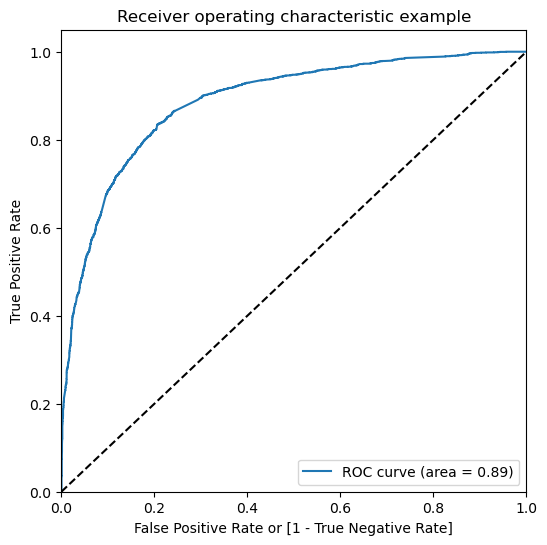

In [2025]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### The model is good because the we have the 0.89  area under the ROC curve

Let's try to creats some columns with differnet probability cutoffs

In [2026]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.323977          0    1    1    1    1    0    0    0   
1          0         0.197286          0    1    1    0    0    0    0    0   
2          0         0.278428          0    1    1    1    0    0    0    0   
3          0         0.830268          1    1    1    1    1    1    1    1   
4          0         0.161052          0    1    1    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    1    1    0  
4    0    0    0

In [2027]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.599876  0.967153  0.373563
0.2   0.2  0.755411  0.911598  0.659170
0.3   0.3  0.803958  0.839822  0.781859
0.4   0.4  0.814471  0.772506  0.840330
0.5   0.5  0.818336  0.708029  0.886307
0.6   0.6  0.802566  0.603001  0.925537
0.7   0.7  0.783859  0.514599  0.949775
0.8   0.8  0.761441  0.420519  0.971514
0.9   0.9  0.717223  0.276967  0.988506


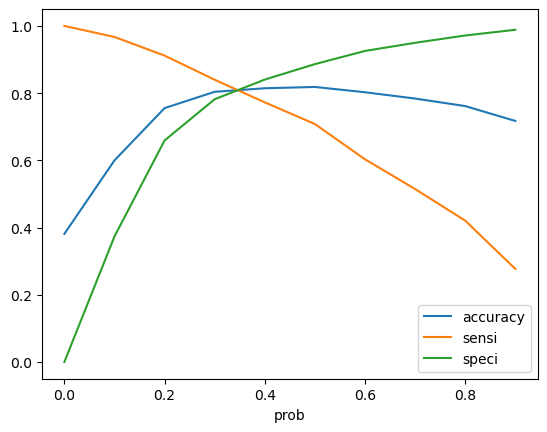

In [2028]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [2029]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.323977          0    1    1    1    1    0    0    0   
1          0         0.197286          0    1    1    0    0    0    0    0   
2          0         0.278428          0    1    1    1    0    0    0    0   
3          0         0.830268          1    1    1    1    1    1    1    1   
4          0         0.161052          0    1    1    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    1    1    0                1  
4    0    0    0                0

In [2030]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8150896722325294

In [2031]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3402,  600],
       [ 596, 1870]], dtype=int64)

In [2032]:
TP = confusion2[1,1] # True Positive 
TN = confusion2[0,0] # True Negatives
FP = confusion2[0,1] # False Positives
FN = confusion2[1,0] # False Negatives

Sensitivity

In [2033]:
TP/(TP+FN)

0.7583130575831306

Specificity

## Predication on the test data set

In [2034]:
X_test[['Page Views Per Visit','TotalVisits','Total Time Spent on Website']] = scaler.transform(X_test[['Page Views Per Visit','TotalVisits',
                                                                                                        'Total Time Spent on Website'
                                                                                                    ]])

In [2035]:
X_test = X_test[col]
X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
4269     0.031873                     0.444982              0.145455   
2376     0.000000                     0.000000              0.000000   
7766     0.019920                     0.025968              0.090909   
9199     0.000000                     0.000000              0.000000   
4359     0.000000                     0.000000              0.000000   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4269                                    0                          0   
2376                                    0                          1   
7766                                    0                          0   
9199                                    0                          0   
4359                                    0                          1   

      Lead Source_Olark Chat  Lead Source_Welingak Website  Do Not Email_Yes  \
4269                       0                             0                 0   
2376                       0                             0                 0   
7766                       0                             0                 0   
9199                       1                             0                 0   
4359                       0                             0                 0   

      Last Activity_Converted to Lead  Last Activity_Email Bounced  \
4269                                0                            0   
2376                                0                            0   
7766                                0                            0   
9199                                0                            0   
4359                                0                            0   

      Last Activity_Had a Phone Conversation  \
4269                                       0   
2376                                       0   
7766                                       0   
9199                                       0   
4359                                       0   

      Last Activity_Olark Chat Conversation  Last Activity_SMS Sent  \
4269                                      0                       1   
2376                                      0                       1   
7766                                      0                       0   
9199                                      1                       0   
4359                                      0                       0   

      Specialization_Hospitality Management  Specialization_Other  \
4269                                      0                     1   
2376                                      0                     1   
7766                                      0                     0   
9199                                      0                     1   
4359                                      0                     0   

      What is your current occupation_Housewife  \
4269                                          0   
2376                                          0   
7766                                          0   
9199                                          0   
4359                                          0   

      What is your current occupation_Working Professional  \
4269                                                  0      
2376                                                  0      
7766                                                  1      
9199                                                  0      
4359                                                  0      

      Last Notable Activity_Email Link Clicked  \
4269                                         0   
2376                                         0   
7766                                         0   
9199                                         0   
4359                                         0   

      Last Notable Activity_Email Opened  \
4269                                   0   
2376                                  

In [2036]:
X_test_sm = sm.add_constant(X_test)


In [2037]:
X_test_sm

const  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
4269    1.0     0.031873                     0.444982              0.145455   
2376    1.0     0.000000                     0.000000              0.000000   
7766    1.0     0.019920                     0.025968              0.090909   
9199    1.0     0.000000                     0.000000              0.000000   
4359    1.0     0.000000                     0.000000              0.000000   
...     ...          ...                          ...                   ...   
8649    1.0     0.059761                     0.127641              0.027273   
2152    1.0     0.000000                     0.000000              0.000000   
7101    1.0     0.000000                     0.000000              0.000000   
5331    1.0     0.011952                     0.707746              0.054545   
2960    1.0     0.000000                     0.000000              0.000000   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4269                                    0                          0   
2376                                    0                          1   
7766                                    0                          0   
9199                                    0                          0   
4359                                    0                          1   
...                                   ...                        ...   
8649                                    1                          0   
2152                                    0                          1   
7101                                    0                          0   
5331                                    1                          0   
2960                                    0                          1   

      Lead Source_Olark Chat  Lead Source_Welingak Website  Do Not Email_Yes  \
4269                       0                             0                 0   
2376                       0                             0                 0   
7766                       0                             0                 0   
9199                       1                             0                 0   
4359                       0                             0                 0   
...                      ...                           ...               ...   
8649                       0                             0                 0   
2152                       0                             0                 0   
7101                       1                             0                 0   
5331                       0                             0                 1   
2960                       0                             0                 0   

      Last Activity_Converted to Lead  Last Activity_Email Bounced  \
4269                                0                            0   
2376                                0                            0   
7766                                0                            0   
9199                                0                            0   
4359                                0                            0   
...                               ...                          ...   
8649                                0                            0   
2152                                0                            0   
7101                                0                            0   
5331                                0                            0   
2960                                0                            0   

      Last Activity_Had a Phone Conversation  \
4269                                       0   
2376                                       0   
7766                                       0   
9199                                       0   
4359                                       0   
...                                      ...   
8649                                       0   
2152  

In [2038]:
X_test.drop(['What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 
                     'Last Notable Activity_Had a Phone Conversation'], 1, 
                                inplace = True)

In [2039]:
y_test_pred = res.predict(sm.add_constant(X_test))

In [2040]:
y_test_pred[:10]

4269    0.213250
2376    0.154988
7766    0.220029
9199    0.057517
4359    0.927132
9186    0.957572
1631    0.998885
8963    0.595375
8007    0.710838
5324    0.912678
dtype: float64

Let's convert the y_pred to dataframe

In [2041]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

0
4269  0.213250
2376  0.154988
7766  0.220029
9199  0.057517
4359  0.927132

Let's convert the y_test to dataframe

In [2042]:
y_test_df = pd.DataFrame(y_test)

Let's removed the indexes for both dataframes we have created

In [2043]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [2044]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

Converted         0
0          1  0.213250
1          1  0.154988
2          1  0.220029
3          0  0.057517
4          1  0.927132

In [2045]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'}) #renaming the column
y_pred_final.head()

Converted  Conversion_Prob
0          1         0.213250
1          1         0.154988
2          1         0.220029
3          0         0.057517
4          1         0.927132

In [2046]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          1         0.213250                0
1          1         0.154988                0
2          1         0.220029                0
3          0         0.057517                0
4          1         0.927132                1

In [2047]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.5082972582972582

In [2048]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[ 579, 1098],
       [ 265,  830]], dtype=int64)

In [2049]:
TP = confusion2[1,1] # True Positive 
TN = confusion2[0,0] # True Negatives
FP = confusion2[0,1] # False Positives
FN = confusion2[1,0] # False Negatives

sensitivity

In [2050]:
TP / float(TP+FN)

0.7579908675799086

specificity

In [2051]:
TN / float(TN+FP)

0.34525939177101966

##### Precision Recall View

In [2052]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3547,  455],
       [ 720, 1746]], dtype=int64)

In [2053]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.793275783734666

In [2054]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.708029197080292

In [2055]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: Predicted, Length: 6468, dtype: int64)

In [2056]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.323977          0    1    1    1    1    0    0    0   
1          0         0.197286          0    1    1    0    0    0    0    0   
2          0         0.278428          0    1    1    1    0    0    0    0   
3          0         0.830268          1    1    1    1    1    1    1    1   
4          0         0.161052          0    1    1    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    1    1    0                1  
4    0    0    0                0

Accuracy 

In [2057]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8170995670995671

Confusion Matrix

In [2058]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3442,  560],
       [ 623, 1843]], dtype=int64)

In [2059]:
TP = confusion2[1,1] # True Positive 
TN = confusion2[0,0] # True Negatives
FP = confusion2[0,1] # False Positives
FN = confusion2[1,0] # False Negatives

Sensitivity 

In [2060]:
TP / (TP+FN)

0.7473641524736415

Specificity

In [2061]:
TN/(TN+FP)

0.8600699650174912

Precision

In [2062]:
TP/(TP+FP)

0.7669579692051602

Recall

In [2063]:
TP/(TP+FN)

0.7473641524736415

###### Assigning Lead Score to the Testing data

In [2064]:
y_pred_final['Lead_Score'] = y_pred_final.Conversion_Prob.map( lambda x: round(x*100))
y_pred_final.head()

Converted  Conversion_Prob  final_predicted  Lead_Score
0          1         0.213250                0          21
1          1         0.154988                0          15
2          1         0.220029                0          22
3          0         0.057517                0           6
4          1         0.927132                1          93

##### Observations:
We achieved the below results after running the model on the Test Data:
###### Test Data:
Accuracy : 81.71 %
Sensitivity : 74.74 %
Specificity : 86.01 %
###### Train Data:
Accuracy : 81.84%
Sensitivity : 70.80 %
Specificity : 88.63 %

##### the below leads shoud be contacted

In [2069]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=86]
hot_leads

Converted  Conversion_Prob  final_predicted  Lead_Score
4             1         0.927132                1          93
5             1         0.957572                1          96
6             1         0.998885                1         100
9             1         0.912678                1          91
11            0         0.994593                1          99
...         ...              ...              ...         ...
2765          0         0.979726                1          98
2766          0         0.979769                1          98
2767          0         0.899552                1          90
2769          0         0.876096                1          88
2770          0         0.968479                1          97

[1353 rows x 4 columns]